## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.023714 -0.783729  1.009571  0.770798 -1.610388 -0.323368
1 -0.703322 -0.288012 -0.419879  0.588922  0.108248 -0.170623
2 -1.578431  1.015397 -0.384306 -0.405668  0.978664 -1.044946
3  1.488882 -0.077368 -0.352605 -0.953560 -1.487720 -0.366218
4 -0.604660 -1.132148  0.880403  1.143357 -0.021506 -0.249836


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9914343	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9817510	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9715439	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9615741	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9546503	total: 60.1ms	remaining: 12s
5:	learn: 0.9440535	total: 60.6ms	remaining: 10s
6:	learn: 0.9342014	total: 61.1ms	remaining: 8.67s
7:	learn: 0.9252907	total: 61.6ms	remaining: 7.64s
8:	learn: 0.9154776	total: 62.3ms	remaining: 6.85s
9:	learn: 0.9069894	total: 62.7ms	remaining: 6.21s
10:	learn: 0.8987835	total: 63.2ms	remaining: 5.68s
11:	learn: 0.8888866	total: 63.6ms	remaining: 5.24s
12:	learn: 0.8789119	total: 64.1ms	remaining: 4.86s
13:	learn: 0.8710355	total: 64.6ms	remaining: 4.55s
14:	learn: 0.8627141	total: 65ms	remaining: 4.27s
15:	learn: 0.8559003	total: 65.4ms	remaining: 4.02s
16:	learn: 0.8485427	total: 66ms	remaining: 3.81s
17:	learn: 0.8414991	total: 66.4ms	remaining: 3.62s
18:	learn: 0.8338454	total: 66.9ms	remaining: 3.45s


105:	learn: 0.3959984	total: 109ms	remaining: 919ms
106:	learn: 0.3923581	total: 110ms	remaining: 914ms
107:	learn: 0.3885203	total: 110ms	remaining: 909ms
108:	learn: 0.3852229	total: 111ms	remaining: 904ms
109:	learn: 0.3819795	total: 111ms	remaining: 898ms
110:	learn: 0.3796826	total: 112ms	remaining: 893ms
111:	learn: 0.3768238	total: 112ms	remaining: 888ms
112:	learn: 0.3742231	total: 113ms	remaining: 884ms
113:	learn: 0.3713765	total: 113ms	remaining: 878ms
114:	learn: 0.3686834	total: 114ms	remaining: 874ms
115:	learn: 0.3660680	total: 114ms	remaining: 869ms
116:	learn: 0.3631151	total: 115ms	remaining: 864ms
117:	learn: 0.3608626	total: 115ms	remaining: 861ms
118:	learn: 0.3581877	total: 116ms	remaining: 856ms
119:	learn: 0.3559863	total: 116ms	remaining: 851ms
120:	learn: 0.3534505	total: 117ms	remaining: 847ms
121:	learn: 0.3512380	total: 117ms	remaining: 842ms
122:	learn: 0.3486891	total: 117ms	remaining: 837ms
123:	learn: 0.3462509	total: 118ms	remaining: 834ms
124:	learn: 

266:	learn: 0.1440295	total: 187ms	remaining: 514ms
267:	learn: 0.1437212	total: 188ms	remaining: 514ms
268:	learn: 0.1431499	total: 189ms	remaining: 513ms
269:	learn: 0.1424325	total: 189ms	remaining: 512ms
270:	learn: 0.1413965	total: 190ms	remaining: 510ms
271:	learn: 0.1409204	total: 190ms	remaining: 509ms
272:	learn: 0.1401676	total: 190ms	remaining: 507ms
273:	learn: 0.1392250	total: 191ms	remaining: 506ms
274:	learn: 0.1386027	total: 191ms	remaining: 505ms
275:	learn: 0.1382659	total: 192ms	remaining: 504ms
276:	learn: 0.1376577	total: 192ms	remaining: 502ms
277:	learn: 0.1368659	total: 193ms	remaining: 501ms
278:	learn: 0.1363659	total: 193ms	remaining: 499ms
279:	learn: 0.1354487	total: 194ms	remaining: 498ms
280:	learn: 0.1350492	total: 194ms	remaining: 496ms
281:	learn: 0.1341435	total: 195ms	remaining: 495ms
282:	learn: 0.1338583	total: 195ms	remaining: 494ms
283:	learn: 0.1331509	total: 195ms	remaining: 493ms
284:	learn: 0.1327389	total: 196ms	remaining: 491ms
285:	learn: 

488:	learn: 0.0522930	total: 293ms	remaining: 306ms
489:	learn: 0.0519409	total: 293ms	remaining: 305ms
490:	learn: 0.0516405	total: 294ms	remaining: 304ms
491:	learn: 0.0513555	total: 294ms	remaining: 304ms
492:	learn: 0.0510803	total: 295ms	remaining: 303ms
493:	learn: 0.0507923	total: 295ms	remaining: 302ms
494:	learn: 0.0505258	total: 295ms	remaining: 301ms
495:	learn: 0.0502455	total: 296ms	remaining: 301ms
496:	learn: 0.0499868	total: 296ms	remaining: 300ms
497:	learn: 0.0496664	total: 297ms	remaining: 299ms
498:	learn: 0.0493537	total: 297ms	remaining: 298ms
499:	learn: 0.0490409	total: 298ms	remaining: 298ms
500:	learn: 0.0487804	total: 298ms	remaining: 297ms
501:	learn: 0.0484722	total: 299ms	remaining: 296ms
502:	learn: 0.0482181	total: 299ms	remaining: 296ms
503:	learn: 0.0480834	total: 300ms	remaining: 295ms
504:	learn: 0.0478296	total: 300ms	remaining: 294ms
505:	learn: 0.0475951	total: 300ms	remaining: 293ms
506:	learn: 0.0473532	total: 301ms	remaining: 293ms
507:	learn: 

652:	learn: 0.0276747	total: 371ms	remaining: 197ms
653:	learn: 0.0276234	total: 372ms	remaining: 197ms
654:	learn: 0.0275011	total: 372ms	remaining: 196ms
655:	learn: 0.0274511	total: 372ms	remaining: 195ms
656:	learn: 0.0272810	total: 373ms	remaining: 195ms
657:	learn: 0.0271623	total: 373ms	remaining: 194ms
658:	learn: 0.0270832	total: 374ms	remaining: 193ms
659:	learn: 0.0270058	total: 374ms	remaining: 193ms
660:	learn: 0.0268982	total: 374ms	remaining: 192ms
661:	learn: 0.0268717	total: 375ms	remaining: 191ms
662:	learn: 0.0267738	total: 375ms	remaining: 191ms
663:	learn: 0.0266353	total: 376ms	remaining: 190ms
664:	learn: 0.0265609	total: 376ms	remaining: 190ms
665:	learn: 0.0264654	total: 377ms	remaining: 189ms
666:	learn: 0.0263928	total: 377ms	remaining: 188ms
667:	learn: 0.0263675	total: 378ms	remaining: 188ms
668:	learn: 0.0262803	total: 378ms	remaining: 187ms
669:	learn: 0.0261907	total: 379ms	remaining: 187ms
670:	learn: 0.0261260	total: 379ms	remaining: 186ms
671:	learn: 

875:	learn: 0.0123482	total: 476ms	remaining: 67.3ms
876:	learn: 0.0122991	total: 476ms	remaining: 66.8ms
877:	learn: 0.0122452	total: 477ms	remaining: 66.2ms
878:	learn: 0.0121865	total: 477ms	remaining: 65.7ms
879:	learn: 0.0121284	total: 478ms	remaining: 65.1ms
880:	learn: 0.0121152	total: 478ms	remaining: 64.6ms
881:	learn: 0.0120582	total: 479ms	remaining: 64ms
882:	learn: 0.0120453	total: 479ms	remaining: 63.5ms
883:	learn: 0.0119937	total: 480ms	remaining: 62.9ms
884:	learn: 0.0119480	total: 480ms	remaining: 62.4ms
885:	learn: 0.0118908	total: 481ms	remaining: 61.9ms
886:	learn: 0.0118355	total: 481ms	remaining: 61.3ms
887:	learn: 0.0118018	total: 482ms	remaining: 60.7ms
888:	learn: 0.0117476	total: 482ms	remaining: 60.2ms
889:	learn: 0.0116982	total: 482ms	remaining: 59.6ms
890:	learn: 0.0116655	total: 483ms	remaining: 59.1ms
891:	learn: 0.0116206	total: 483ms	remaining: 58.5ms
892:	learn: 0.0115679	total: 484ms	remaining: 57.9ms
893:	learn: 0.0115172	total: 484ms	remaining: 57

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

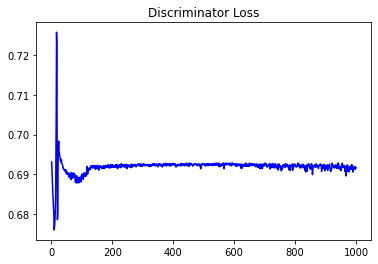

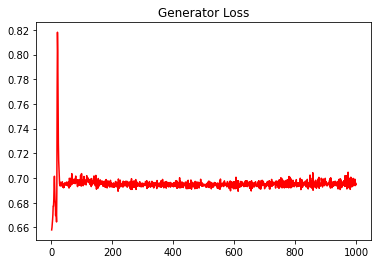

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.053115403351818524


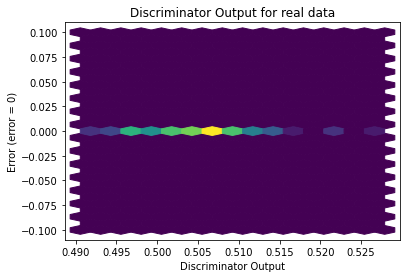

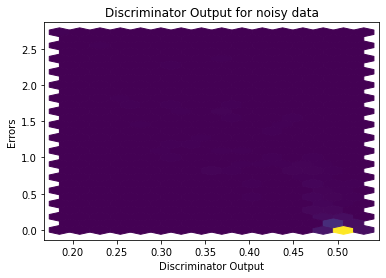

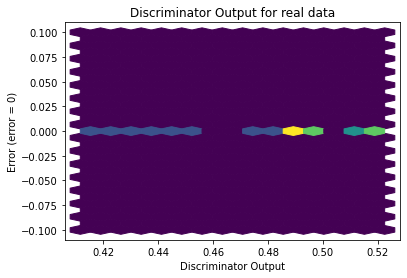

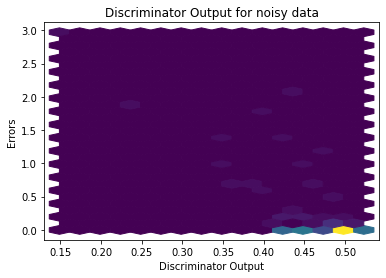

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


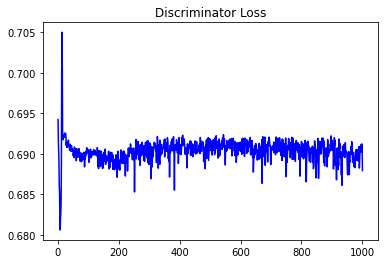

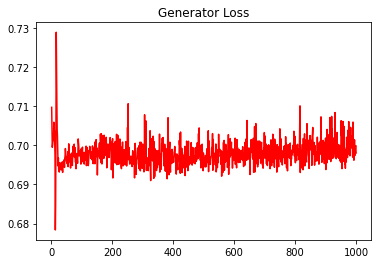

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09412243887469916


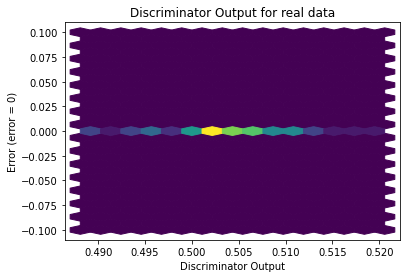

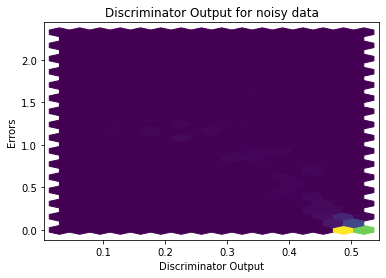

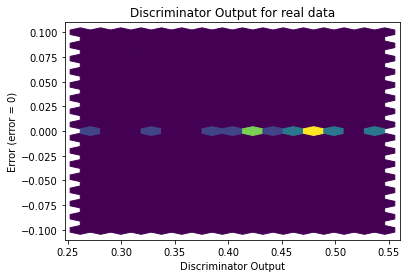

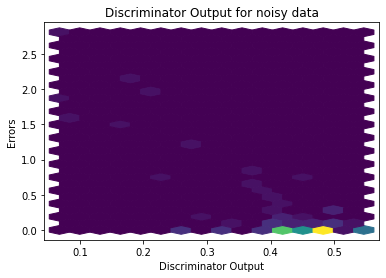

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8572]], requires_grad=True)
